In [59]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Newton-Cotes Integration

* Integrate $f(x)=\sin(x)$ from $x=0$ to $x = \pi$ using the midpoint rule, the trapezoidal rule and Simpson's rule. Show how the three converge with decreasing step size $h$ and compare their errors

* Compute the integral using the midpoint rule, the trapezoidal rule and Simpson's rule. Compare the errors and show how the three converge with decreasing step size h 

$$I = \int_{0}^{\pi}x\sin(x)dx$$

---
 

Numerical integratien is also referref to as quadrature. Even thought the term typically applies to one-dimensional integrals, in abroad sensem it is used along with the tern *cubature* for highrt-dimensional integration too. In general, any quadrature formula replaces the integral by a weighted sum of integrand values do particular points from the integration domain, $x_{i} \in [a,b]$, and features a specific *truncation error* $R_{n}$

$$\int_{a}^{b}f(x)dx = \sum_{i=1}^{n}w_{i}f(x_{i})+R_{n}$$

A quadrature formula employing only information from interior points of the integration domain is called *open*, whilw a formula based also on the integrand values on the boundaries is called *closed*

---

### Midpoint rule

We might approximate the given integral using a Riemann sum. have looked at the left end-point approximation and the right end point approximation to $\int_{a}^{b}f(x)dx$ in integral calculus. 

If $f$ is integrable on $[a,b]$, then

$$\int_{a}^{b}f(x)dx \approx M_{n}$$

$$M_{n} = \sum_{i=1}^{n}f(\overline{x}_{i})\Delta x = \Delta x(f(\overline{x}_{1})+\cdots+f(\overline{x}_{n}))$$

where

$$\Delta x=\frac{b-a}{n}\qquad x_{i}=a+i\Delta x\qquad \overline{x}_{i} =\frac{1}{2}(x_{i-1}+x_{i}) $$


The error is 

$$E_{RM}(f) = \frac{dx^{2}(b-a)}{24}f''(\theta)$$

Now the function to calculate the integral


In [95]:
def Midpoint(f,a,b,n):
    dx = (b-a)/n
    x = np.arange(a,b+dx,dx)
    m=0.
    for i in range(1,len(x)):
        m += f(0.5*(x[i-1] + x[i])) 
    return dx*m

def EMidpoint(ddf,a,b,n):
    dx = (b-a)/n
    x = np.arange(a,b+dx,dx)
    return sum(abs(dx**2 * (b-a)/24. * ddf(x)))/n
    
    


    

In [89]:
def f(x):
    return x*np.sin(x)

def ddf(x):
    return 2.0*np.cos(x)-x*np.sin(x)

a= 0 ; b = np.pi
n = np.arange(10,10000)
dx = (b-a)/n
Error1 =[]
for i in n:
    Error1.append(EMidpoint(ddf,a,b,i))



Integral value =  3.1415926665116523
Error =  2.436732024411408e-08


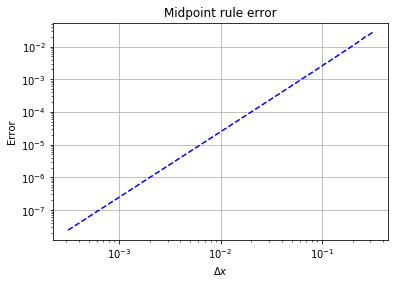

In [90]:
plt.plot(dx,Error1,"b--")
plt.xlabel("$\Delta x$")
plt.ylabel("Error")
plt.xscale("log")
plt.grid(True)
plt.title("Midpoint rule error")
plt.yscale("log")

print ("Integral value = " , Midpoint(f,a,b,n[-1]))
print ("Error = ",EMidpoint(ddf,a,b,n[-1]))

## Trapezoidal rule

We can also approximate a definite integral using an approximation by trapezoids as shown in the picture below for $f(x)>0$

<img src="traprule.png">

The area of the trapezoid above the interval $[x_{i},x_{i+1}]$ is $\Delta x[(f(x_{i})+f(x_{i+1}))/2]$.

If $f$ is integrable on $[a,b]$, then 

$$\int_{a}^{b}f(x)dx \approx T_{n}$$

$$T_{n} = \frac{\Delta x}{2}\left(f(x_{o})+ 2f(x_{1})+\cdots + 2f(x_{n-1})+f(x_{n})\right)$$

where

$$\Delta x = \frac{b-a}{n} \qquad x_{i} = a+i\Delta x$$



In [96]:
def TrapRule(f,a,b,n):
    dx=(b-a)/(n-1)
    s = 0.5*(f(a)+f(b))
    for i in range(1,n-1):
        s += f(a+i*dx)
    return dx*s


def ETrapRule(ddf,a,b,n):
    dx = (b-a)/n
    x = np.arange(a,b+dx,dx)
    return sum(abs(dx**2 * (b-a)/12. * ddf(x)))/n
    
    


Integral value =  3.141592627740893
Error =  4.873464048822816e-08


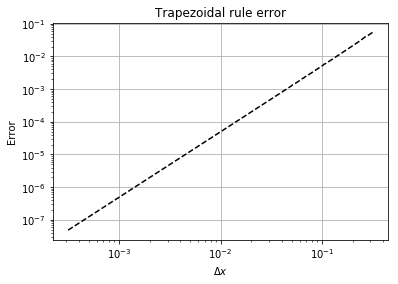

In [100]:

TrapRule(f,a,b,n[-1])
Error2 =[]
for i in n:
    Error2.append(ETrapRule(ddf,a,b,i))


plt.plot(dx,Error2,"k--")
plt.xlabel("$\Delta x$")
plt.ylabel("Error")
plt.xscale("log")
plt.grid(True)
plt.title("Trapezoidal rule error")
plt.yscale("log")

print ("Integral value = " , TrapRule(f,a,b,n[-1]))
print ("Error = ",ETrapRule(ddf,a,b,n[-1]))

## Simpson's Rule

We can also approximate a definite integral using parabolas to approximate the curve. Three points determine a unique parabola. We draw a parabolic segmetn using the three points on the curve $x_{o},x_{1},x_{2}$. We draw a second parabolic segment using the three points on the curve above $x_{1},x_{2},x_{3}$, etc. The area of the parabolic region beneath the parabola above the interval $[x_{i-1},x_{i+1}]$ is $\frac{\Delta x}{3}[f(x_{i-1})+4f(x_{i})+f(x_{i+1})]$. We estimate the integral by summing the areas of the regions below these parabolic segments to get **Simpson's Rule**. It's important note that n is even

$$\int_{a}^{b}f(x)dx \approx S_{n}$$

$$S_{n} = \frac{\Delta x}{3}(f(x_{o})+4f(x_{1})+2f(x_{2})+4f(x_{3})+\cdots+2f(x_{n-2})+4f(x_{n-1})+f(x_{n})))$$

by regrouping the terms, one obtains **Simpson's rule**

$$S_{n} = \frac{\Delta x}{3}(f_{1}+4\sigma_{2}+2\sigma_{1}+f_{n})$$

where

$$\sigma_{1} = \sum_{i=\text{odd}}^{n-2}f_{i}\qquad\sigma_{2} = \sum_{i=\text{even}}^{n-1}f_{i}$$

Sum $\sigma_{1}$ is composed only of the odd index terms, while $\sigma_{2}$ cumulates the even index ones and contains one ter more than $\sigma_{1}$

Assuming $f(x)$ to be continuous of class $C^{(4)}[a,b]$, the error term of Simpson's rule results by the next expression

$$E_{s} = -\frac{(b-a)}{180}dx^{4}f^{(4)}(x)\qquad x\in[a,b]$$



We write the code

In [143]:
def Simpson(f,a,b,n):
    if (n%2 == 0):
        n += 1
    dx=(b-a)/(n-1)
    s1=s2=0.
    for i in range(2,n-2,2): s1 += f(a+i*dx)
    for i in range(1,n-1,2): s2 += f(a+i*dx)
    return (dx/3)*(f(a)+4*s2+2*s1+f(b))


def d4f(x):
    return 2.0*np.sin(x)+np.sin(x)

def ESimpson(d4f,a,b,n):
    dx=(b-a)/(n-1)
    x = np.arange(a,b+dx,dx)
    return sum(abs(-((b-a)/180.) * dx**4 * d4f(x)))/n

print ("Integral value = " , Simpson(f,a,b,n[-1]))
print ("Error = ",ESimpson(d4f,a,b,n[-1]))

Integral value =  3.141592653589797
Error =  3.2492435601107007e-16


In [144]:
Error3 =[]
for i in n:
    Error3.append(ESimpson(ddf,a,b,i))

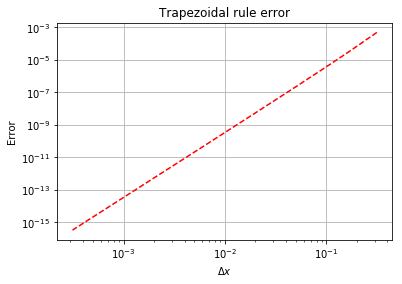

In [145]:

plt.plot(dx,Error3,"r--")
plt.xlabel("$\Delta x$")
plt.ylabel("Error")
plt.xscale("log")
plt.grid(True)
plt.title("Trapezoidal rule error")
plt.yscale("log")

Midpoint Integral value =  3.1415926665116523
Traprule Integral value =  3.141592627740893
Simpson's Integral value =  3.141592653589797


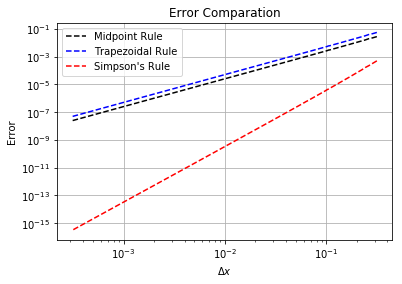

In [146]:
plt.plot(dx,Error1,"k--", label = "Midpoint Rule")
plt.plot(dx,Error2,"b--",label = "Trapezoidal Rule")
plt.plot(dx,Error3,"r--",label = "Simpson's Rule")
plt.xlabel("$\Delta x$")
plt.ylabel("Error")
plt.xscale("log")
plt.grid(True)
plt.title("Error Comparation")
plt.yscale("log")
plt.legend()


print ("Midpoint Integral value = " , Midpoint(f,a,b,n[-1]))
print ("Traprule Integral value = " , TrapRule(f,a,b,n[-1]))
print ("Simpson's Integral value = " , Simpson(f,a,b,n[-1]))

In [133]:
m =[];t=[];s=[]
for i in n:
    m.append(Midpoint(f,a,b,i))    
    t.append(TrapRule(f,a,b,i))    
    s.append(Simpson(f,a,b,i))

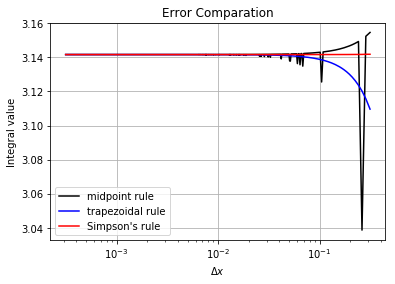

In [141]:
plt.plot(dx,m,"k-",label = "midpoint rule")
plt.plot(dx,t,"b-",label = "trapezoidal rule")
plt.plot(dx,s,"r-",label = "Simpson's rule")
plt.xlabel("$\Delta x$")
plt.ylabel("Integral value")
plt.xscale("log")
plt.grid(True)
plt.title("Converge Comparation")
plt.legend()




Now for  $f(x) = \sin(x)$

In [147]:
a= 0 ; b = np.pi
n = np.arange(10,10000)
dx = (b-a)/n

def g(x):
    return np.sin(x)

def ddg(x):
    return -np.sin(x)

def d4g(x):
    return np.sin(x)



In [150]:

E1 =[]
E2 =[]
E3 =[]
for i in n:
    E1.append(EMidpoint(ddg,a,b,i))    
    E2.append(ETrapRule(ddg,a,b,i))    
    E3.append(ESimpson(d4g,a,b,i))

Midpoint Integral value =  2.0000000082263165
Traprule Integral value =  1.99999998354408
Simpson's Integral value =  1.9999999999999982


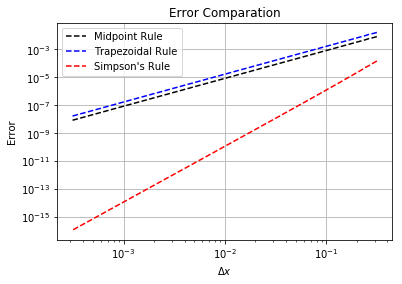

In [151]:
plt.plot(dx,E1,"k--", label = "Midpoint Rule")
plt.plot(dx,E2,"b--",label = "Trapezoidal Rule")
plt.plot(dx,E3,"r--",label = "Simpson's Rule")
plt.xlabel("$\Delta x$")
plt.ylabel("Error")
plt.xscale("log")
plt.grid(True)
plt.title("Error Comparation")
plt.yscale("log")
plt.legend()


print ("Midpoint Integral value = " , Midpoint(g,a,b,n[-1]))
print ("Traprule Integral value = " , TrapRule(g,a,b,n[-1]))
print ("Simpson's Integral value = " , Simpson(g,a,b,n[-1]))

In [154]:
m1 =[];t1=[];s1=[]
for i in n:
    m1.append(Midpoint(g,a,b,i))    
    t1.append(TrapRule(g,a,b,i))    
    s1.append(Simpson(g,a,b,i))

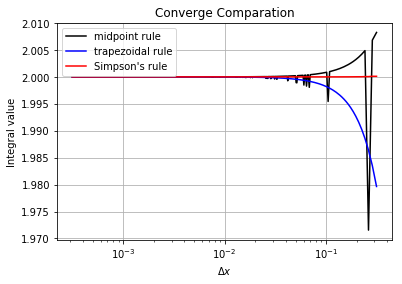

In [155]:
plt.plot(dx,m1,"k-",label = "midpoint rule")
plt.plot(dx,t1,"b-",label = "trapezoidal rule")
plt.plot(dx,s1,"r-",label = "Simpson's rule")
plt.xlabel("$\Delta x$")
plt.ylabel("Integral value")
plt.xscale("log")
plt.grid(True)
plt.title("Converge Comparation")
plt.legend()


